In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [8]:
data = pd.read_csv('../Data/cleanedData/cleaned_data.csv')

In [9]:
data.drop(columns=['Mã lịch sử giá'], inplace=True)

In [10]:

for ft in ['Xã/Phường','Quận/Huyện','Chủ đầu tư','Tên dự án','Pháp lý','Nội thất']:
    count = data[ft].drop_duplicates().count()
    print(ft, count)

Xã/Phường 195
Quận/Huyện 22
Chủ đầu tư 129
Tên dự án 230
Pháp lý 3
Nội thất 4


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Mã hóa categorical bằng LabelEncoder
label_enc = LabelEncoder()
for col in ['Xã/Phường', 'Quận/Huyện', 'Chủ đầu tư', 'Tên dự án', 'Pháp lý', 'Nội thất']:
    data[col] = label_enc.fit_transform(data[col])

# Chia dữ liệu thành X và y
X = data.drop(columns=['Mức giá'])
y = data['Mức giá']

# Xây dựng mô hình Random Forest
model = RandomForestRegressor(random_state=0)
model.fit(X, y)

# Lấy độ quan trọng của các biến
feature_importance = pd.DataFrame({
    'Biến': X.columns,
    'Độ quan trọng': model.feature_importances_
}).sort_values(by='Độ quan trọng', ascending=False)

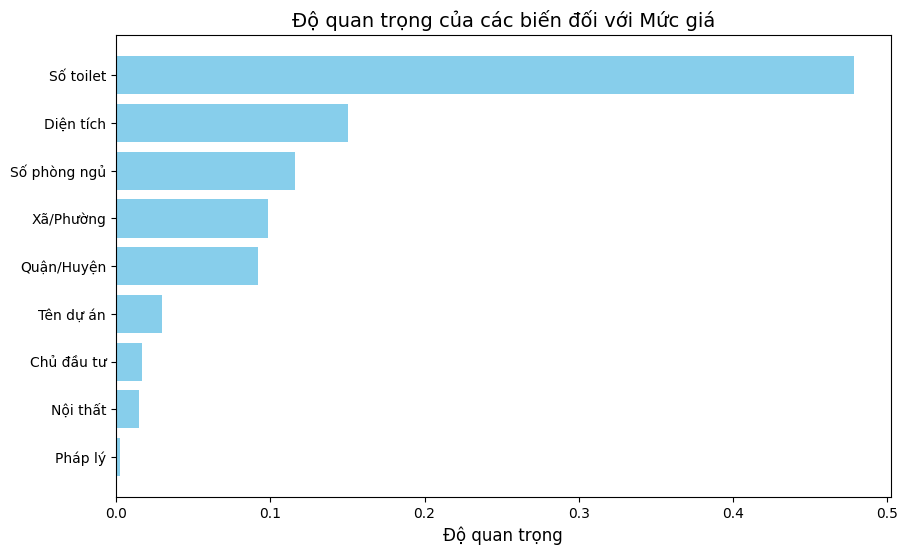

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Biến'], feature_importance['Độ quan trọng'], color='skyblue')
plt.xlabel('Độ quan trọng', fontsize=12)
plt.title('Độ quan trọng của các biến đối với Mức giá', fontsize=14)
plt.gca().invert_yaxis()
plt.show()
